# Final
-  Ariel Rodrigo Colque Garcia
-  Dataset [wmt16](https://huggingface.co/datasets/wmt16/viewer/de-en/train)

In [1]:
!pip install transformers
!pip install datasets
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 7.4 MB/s eta 0:00:00

# Fine Tuning

Es una técnica utilizada en el aprendizaje automático para mejorar un modelo pre-entrenado en una tarea o dominio específico. En lugar de entrenar un modelo desde cero, lo que puede resultar en mejoras significativas en el rendimiento y la capacidad de generalización del modelo en la tarea deseada.

El ajuste fino se realiza mejor cuando el conjunto de datos de ajuste fino es relevante y similar al conjunto de datos de pre-entrenamiento original del modelo.


# Fine-tuning al modelo Helsinki-NLP/opus-mt-en-de con el conjunto de datos WMT16 de-en
El sentido de realizar fine tining es mejorar aún más el rendimiento del modelo en la tarea específica de traducción de alemán a inglés. Aunque el modelo ya ha sido entrenado con un conjunto de datos que contiene pares de idiomas similares (alemán a inglés), el fine-tuning con datos adicionales puede ayudar a ajustar y adaptar el modelo a una variedad más amplia de ejemplos y a mejorar su desempeño en diferentes dominios y temáticas.

# Carga del Dataset

In [4]:
from datasets import load_dataset, load_metric

# Carga el conjunto de datos WMT16 de-en
raw_datasets = load_dataset("wmt16", "de-en")

# raw_datasets contiene los datos sin procesar, incluyendo particiones de entrenamiento, validación y prueba.
raw_datasets

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split:   0%|          | 0/4548885 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2169 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2999 [00:00<?, ? examples/s]

Dataset wmt16 downloaded and prepared to /root/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 4548885
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2169
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2999
    })
})

El DatasetDict tiene tres particiones:

-  train: La partición de entrenamiento, que contiene 4,548,885 filas de ejemplos. Cada ejemplo en esta partición tiene una característica llamada "translation", que probablemente almacene pares de texto de origen y texto traducido.

-  validation: La partición de validación, que contiene 2,169 filas de ejemplos. Al igual que en la partición de entrenamiento, cada ejemplo tiene la característica "translation".

-  test: La partición de prueba, que contiene 2,999 filas de ejemplos. También utiliza la característica "translation" para almacenar los datos de prueba.

In [5]:
train_data = raw_datasets["train"]
translations = train_data["translation"]

N = 5  # Número de pares de idiomas que deseas mostrar
for i in range(N):
    print(translations[i])

{'de': 'Wiederaufnahme der Sitzungsperiode', 'en': 'Resumption of the session'}
{'de': 'Ich erkläre die am Freitag, dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen, wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe, daß Sie schöne Ferien hatten.', 'en': 'I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999, and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period.'}
{'de': 'Wie Sie feststellen konnten, ist der gefürchtete "Millenium-Bug " nicht eingetreten. Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden.', 'en': "Although, as you will have seen, the dreaded 'millennium bug' failed to materialise, still the people in a number of countries suffered a series of natural disasters that truly were dreadful."}
{'de': 'Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dies

# Cargar el Tokenizador

In [6]:
# Especifica el nombre del modelo que se utilizará
model_marianMT = "Helsinki-NLP/opus-mt-en-de"

# Importa la clase AutoTokenizer de la biblioteca Transformers
from transformers import AutoTokenizer

# Carga el tokenizador pre-entrenado para el modelo especificado
tokenizer = AutoTokenizer.from_pretrained(model_marianMT, use_fast=False)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Es necesario usar el mismo tokenizer para garantizar la consistencia en el procesamiento del texto durante la fase de entrenamiento y durante la generación de predicciones o inferencia.

# Preprocesar el conjunto de datos

In [7]:
prefix = ""  # Para mBART y MarianMT
max_input_length = 128  # Longitud máxima de la entrada / 512 tokens
max_target_length = 128  # Longitud máxima del objetivo
source_lang = "en"  # Idioma de origen
target_lang = "de"  # Idioma de destino


def preprocess_function(examples):
    # Genera los inputs concatenando el prefijo y el texto de origen para cada ejemplo
    inputs = [prefix + ex[source_lang] for ex in examples["translation"]]
    # Obtiene los objetivos correspondientes al idioma de destino para cada ejemplo
    targets = [ex[target_lang] for ex in examples["translation"]]

    # Tokeniza los inputs utilizando el tokenizador y aplica truncamiento si es necesario, para asegurarse de que los textos de entrada no excedan una longitud máxima predefinida.
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    # Configura el tokenizador para los objetivos
    with tokenizer.as_target_tokenizer():
        # Tokeniza los objetivos utilizando el tokenizador y aplica truncamiento si es necesario
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)

    # Agrega los IDs de los tokens de los objetivos al diccionario de los inputs, se realiza para proporcionar los datos de etiquetas al modelo durante la fase de entrenamiento o evaluación.
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Aplica la función de preprocesamiento a los conjuntos de datos tokenizados
tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)

Map:   0%|          | 0/4548885 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/2169 [00:00<?, ? examples/s]

Map:   0%|          | 0/2999 [00:00<?, ? examples/s]

En algunos modelos de procesamiento de lenguaje natural, como los modelos de generación de texto, es común utilizar la técnica de entrenamiento conocida como "aprendizaje supervisado" o "aprendizaje con etiquetas". Esto implica proporcionar tanto los datos de entrada (inputs) como las correspondientes etiquetas (labels)

In [8]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['translation', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 4548885
    })
    validation: Dataset({
        features: ['translation', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2169
    })
    test: Dataset({
        features: ['translation', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2999
    })
})

# Crear un subconjunto del conjunto de datos

In [21]:
# Crear un subconjunto más pequeño del conjunto de entrenamiento con 80,000 ejemplos
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(80000))

# Crear un subconjunto más pequeño del conjunto de evaluación con 2,000 ejemplos
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(2000))

In [24]:
from torch.utils.data import DataLoader

# Crear un DataLoader para el conjunto de entrenamiento
small_train_dataset = DataLoader(small_train_dataset, batch_size=64, shuffle=True)
small_eval_dataset = DataLoader(small_eval_dataset, batch_size=34, shuffle=True)

In [19]:
# Crear un iterador a partir del dataloader
train_iter = iter(small_train_dataset)

# Obtener el primer batch
first_batch = next(train_iter)

# Obtener el primer elemento del batch
primer_elemento = {
    "translation": first_batch["translation"][0],
    "input_ids": first_batch["input_ids"][0],
    "attention_mask": first_batch["attention_mask"][0],
    "labels": first_batch["labels"][0]
}

# Ver los tensores del primer elemento
print(primer_elemento["translation"])
print(primer_elemento["input_ids"])
print(primer_elemento["attention_mask"])
print(primer_elemento["labels"])

{'de': '(Ich weiß nicht, ob sie aber glaube nicht verkaufen).', 'en': '(I do not know if they sell but do not think so).'}
[20, 444, 156, 66, 253, 205, 141, 7303, 144, 156, 66, 569, 88, 122, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[20, 2449, 810, 51, 2, 628, 76, 179, 2787, 51, 4961, 122, 0]


-  primer_elemento["translation"]: Representa la traducción del texto de origen. En el ejemplo, se muestra una traducción en dos idiomas diferentes, alemán ('de') e inglés ('en'). En alemán se muestra "(Ich weiß nicht, ob sie aber glaube nicht verkaufen)", y en inglés se muestra "(I do not know if they sell but do not think so)".

-  primer_elemento["input_ids"]: Contiene los identificadores numéricos de los tokens de entrada. Cada número representa un token específico del texto. En este caso, los números son [20, 444, 156, 66, 253, 205, 141, 7303, 144, 156, 66, 569, 88, 122, 0]. Estos números corresponden a tokens específicos en el vocabulario del modelo.

-  primer_elemento["attention_mask"]: Es una máscara de atención que indica qué tokens son relevantes y cuáles son tokens de relleno. En este caso, todos los valores son 1, lo que significa que todos los tokens son relevantes y no hay tokens de relleno.

-  primer_elemento["labels"]: Representa los identificadores numéricos de los tokens de salida o etiquetas de destino. En este caso, los números son [20, 2449, 810, 51, 2, 628, 76, 179, 2787, 51, 4961, 122, 0]. Estos números corresponden a los tokens específicos en el vocabulario del modelo para la secuencia de salida esperada.

# El modelo

In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

# Cargar el modelo pre-entrenado para tareas de generación de secuencias
model = AutoModelForSeq2SeqLM.from_pretrained(model_marianMT)

# MarianMT

-  shared (compartido): Es la capa de embedding compartida entre el codificador y el decodificador. Es una capa de embedding que mapea los índices de los tokens a vectores de tamaño 512.

-  encoder (codificador): Es la parte del modelo encargada de procesar la secuencia de entrada en el idioma de origen. Está compuesto por una capa de embedding de tokens de entrada, una capa de posicionamiento sinusoidal, y una serie de capas llamadas MarianEncoderLayer. Cada MarianEncoderLayer incluye una capa de atención propia, una capa de normalización, una función de activación SiLU, y dos capas totalmente conectadas.

-  decoder (decodificador): Es la parte del modelo encargada de generar la secuencia de salida en el idioma de destino. Tiene una estructura similar al codificador, pero además incluye una capa de atención hacia el codificador llamada encoder_attn. El decodificador también está compuesto por una capa de embedding de tokens de salida, una capa de posicionamiento sinusoidal y una serie de capas MarianDecoderLayer, que incluyen las mismas capas que las capas del codificador.

-  lm_head: Es una capa lineal que realiza la proyección lineal del vector de salida del decodificador a un espacio de tamaño 58101, que representa el vocabulario del idioma de destino. Esta capa se utiliza para predecir la siguiente palabra en la secuencia de salida.

In [ ]:
model

MarianMTModel(
  (model): MarianModel(
    (shared): Embedding(58101, 512, padding_idx=58100)
    (encoder): MarianEncoder(
      (embed_tokens): Embedding(58101, 512, padding_idx=58100)
      (embed_positions): MarianSinusoidalPositionalEmbedding(512, 512)
      (layers): ModuleList(
        (0-5): 6 x MarianEncoderLayer(
          (self_attn): MarianAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation_fn): SiLUActivation()
          (fc1): Linear(in_features=512, out_features=2048, bias=True)
          (fc2): Linear(in_features=2048, out_features=512, bias=True)
          (final_layer_norm): LayerNorm((512,),

# Hiperparametros

In [ ]:
# Instalar la biblioteca transformers que proporciona una interfaz de alto nivel para trabajar con modelos de lenguaje preentrenados, incluidos los modelos basados en Transformers.
!pip install transformers[torch]

# Instalar la biblioteca accelerate que se utiliza para acelerar el entrenamiento y la inferencia de modelos de aprendizaje automático.
!pip install accelerate -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Definir los argumentos de entrenamiento para el modelo Seq2Seq

args = Seq2SeqTrainingArguments(
  # Directorio donde se guardarán los archivos de entrenamiento, como los checkpoints y los registros de eventos.
  "/content/hiperparametros",
  # Estrategia de evaluación. Se evaluará el modelo al final de cada época.
  evaluation_strategy = "epoch",
  # Tasa de aprendizaje para el entrenamiento del modelo.
  learning_rate=0.00002,
  # learning_rate=0.0001,
  # learning_rate=0.001,
  # Tamaño del batch de entrenamiento por dispositivo.
  per_device_train_batch_size=16,
  # Tamaño del batch de evaluación por dispositivo.
  per_device_eval_batch_size=16,
  # Factor de decaimiento del peso para la regularización del modelo. Se utiliza para penalizar los pesos más grandes y reducir su influencia en la función de pérdida durante la optimización.
  weight_decay=0.01,
  # Número máximo de checkpoints que se guardarán.
  save_total_limit=3,
  # Número de épocas de entrenamiento.
  num_train_epochs=1,
  # Indica que se generen predicciones utilizando el modelo de generación.
  predict_with_generate=True,
)

-  Este objeto DataCollatorForSeq2Seq toma un tokenizador y un modelo como argumentos. Su función principal es combinar los ejemplos de entrenamiento en lotes (batches) y preparar los datos de entrada y salida requeridos para el modelo seq2seq.

-  Al utilizar DataCollatorForSeq2Seq, puedes asegurarte de que los ejemplos de entrenamiento se agrupen en lotes de manera adecuada y que los tensores de entrada y salida se generen correctamente según las necesidades del modelo seq2seq.

-  El propósito del data_collator es tomar estos batches y combinarlos de manera adecuada para formar lotes coherentes que se utilizarán para entrenar el modelo. El data_collator se ocupa de aplicar el padding, el truncamiento y la enmascaración a las entradas y las salidas del modelo, así como de devolver un diccionario con los tensores necesarios para el entrenamiento o la evaluación.


In [ ]:
# Crear un objeto DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(
  tokenizer,   # Tokenizador utilizado para convertir los textos en secuencias de tokens
  model=model   # Modelo utilizado para el entrenamiento o la generación de secuencias
)

In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import evaluate

# Cargar la métrica BLEU de la biblioteca evaluate y asignarla a la variable "metric"
metric = evaluate.load("sacrebleu")
# Cargar la métrica METEOR de la biblioteca evaluate y asignarla a la variable "meteor"
meteor = evaluate.load('meteor')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...



-  La métrica SacreBLEU es una medida de evaluación comúnmente utilizada para evaluar la calidad de las traducciones generadas por sistemas de traducción automática. La puntuación de SacreBLEU varía de 0 a 100, donde un valor más alto indica una mayor similitud entre la traducción generada y las referencias. Una puntuación perfecta de 100 significa una correspondencia exacta con las referencias de traducción.

- La métrica METEOR calcula una puntuación basada en la precisión (cantidad de palabras correctas en la traducción generada), la cobertura (cantidad de palabras correctas en las referencias) y un factor de penalización por la discrepancia de palabras.

In [ ]:
def postprocess_text(preds, labels):
   # Eliminar los espacios en blanco al principio y al final de cada predicción
   preds = [pred.strip() for pred in preds]
   # Crear una lista de listas con las etiquetas, eliminando los espacios en blanco al principio y al final de cada etiqueta
   labels = [[label.strip()] for label in labels]
   # Devolver las predicciones y las etiquetas procesadas
   return preds, labels

Esto es útil para comparar las predicciones del modelo con las etiquetas verdaderas, y calcular métricas como la precisión, el recall o el F1-score. También evita posibles errores por tener espacios en blanco de más en las cadenas de texto.

In [ ]:
# calcula varias métricas de evaluación para las predicciones generadas por un modelo.
def compute_metrics(eval_preds):
   # Extraer las predicciones y las etiquetas del argumento eval_preds, que es una tupla
   preds, labels = eval_preds

   # Si las predicciones son una tupla, quedarse solo con el primer elemento
   if isinstance(preds, tuple):
       preds = preds[0]

   # Decodificar las predicciones usando el tokenizer, y eliminar los tokens especiales
   decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

   # Reemplazar -100 en las etiquetas por el valor del token de relleno, ya que no se pueden decodificar
  #Esto se hace porque -100 es un valor especial que se usa para indicar que una etiqueta debe ser ignorada por el modelo durante el entrenamiento o la evaluación.
   labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

   # Decodificar las etiquetas usando el tokenizer, y eliminar los tokens especiales
   decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

   # Aplicar el post-procesamiento del texto usando la función definida anteriormente
   decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

   # Calcular la métrica BLEU usando las predicciones y las etiquetas decodificadas
   result = metric.compute(predictions=decoded_preds, references=decoded_labels)

   # Calcular la métrica METEOR usando las predicciones y las etiquetas decodificadas
   meteor_result = meteor.compute(predictions=decoded_preds, references=decoded_labels)

   # Contar el número de tokens que no son de relleno en cada predicción, Esto sirve para medir la longitud del texto generado sin contar los tokens que no aportan información.
   prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]

   # Crear un diccionario con los resultados de las métricas y la longitud promedio de las predicciones
   result = {'bleu' : result['score']}
   result["gen_len"] = np.mean(prediction_lens)
   result["meteor"] = meteor_result["meteor"]

   # Redondear los valores de las métricas a cuatro decimales
   result = {k: round(v, 4) for k, v in result.items()}

   # Devolver el diccionario con los resultados
   return result

# The Trainer API

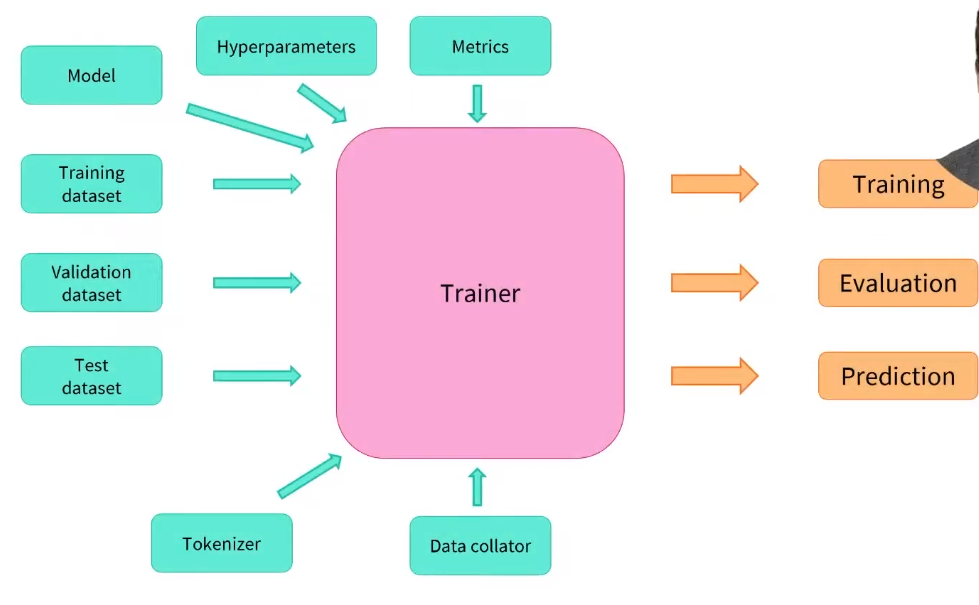

-  Optimizaciones de rendimiento: La API Trainer utiliza técnicas de optimización de rendimiento, como la paralelización y la distribución de datos, para acelerar el entrenamiento de los modelos y aprovechar eficientemente los recursos de hardware disponibles.

-  Registro y seguimiento: La API Trainer permite el registro y seguimiento de métricas durante el entrenamiento, como la pérdida y las métricas de evaluación, facilitando el monitoreo del progreso del entrenamiento.

-  Reproducibilidad: La API Trainer ofrece funcionalidades para garantizar la reproducibilidad de los resultados del entrenamiento, permitiendo fijar semillas aleatorias y asegurando resultados consistentes entre diferentes ejecuciones.



In [ ]:
# Crear un objeto trainer de la clase Seq2SeqTrainer, que es una subclase de la clase Trainer de la librería transformers
trainer = Seq2SeqTrainer(
  # El modelo de generación de texto que se quiere entrenar o evaluar
  model,
  # Los argumentos de entrenamiento o evaluación, como el número de épocas, el tamaño del lote, la tasa de aprendizaje, etc.
  args,
  # El conjunto de datos de entrenamiento, que es una instancia de la clase datasets.Dataset
  train_dataset=small_train_dataset,
  # El conjunto de datos de evaluación, que es otra instancia de la clase datasets.Dataset
  eval_dataset=small_eval_dataset,
  # El objeto data_collator, que es una instancia de la clase DataCollatorForSeq2Seq y que se encarga de preparar los lotes de datos para el modelo
  data_collator=data_collator,
  # El objeto tokenizer, que es una instancia de la clase PreTrainedTokenizer y que se encarga de convertir el texto en tokens y viceversa
  tokenizer=tokenizer,
  # La función compute_metrics definida anteriormente, que se encarga de calcular las métricas para evaluar el modelo
  compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Bleu,Gen Len,Meteor
1,No log,1.172033,36.550900,26.880000,0.628300


TrainOutput(global_step=63, training_loss=2.104553707062252, metrics={'train_runtime': 94.3065, 'train_samples_per_second': 10.604, 'train_steps_per_second': 0.668, 'total_flos': 19455542820864.0, 'train_loss': 2.104553707062252, 'epoch': 1.0})

In [ ]:
trainer.save_model()

In [ ]:
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=571bcbdfa30d11f3c67ebe2b94440bad11fb1630a44f8df7f7f666437ad3a64a
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built sacremoses


In [ ]:
# Importar los módulos necesarios
import os
from transformers import MarianMTModel, MarianTokenizer

# Recorrer los archivos en el directorio /content/hiperparametros y mostrar sus nombres
for dirname, _, filenames in os.walk('/content/hiperparametros'):
   for filename in filenames:
       print(os.path.join(dirname, filename))

# Definir el texto de origen en inglés
src_text = ['USA Today is an American daily middle-market newspaper that is the flagship publication of its owner, Gannett. Founded by Al Neuharth on September 15, 1982.']

# Definir el nombre del modelo pre-entrenado para la traducción inglés-alemán
model_name = '/content/hiperparametros/opus-mt-en-de-finetuned-en-to-de'

# Crear el tokenizador a partir del modelo
tokenizer = MarianTokenizer.from_pretrained(model_name)

# Crear el modelo a partir del modelo pre-entrenado
model = MarianMTModel.from_pretrained(model_name)

# Tokenizar el texto de origen y convertirlo en tensores de PyTorch
# Añadir el relleno necesario para que todos los textos tengan la misma longitud
input = tokenizer(src_text, return_tensors="pt", padding=True)

# Generar la traducción usando el modelo
translated = model.generate(**input)

# Decodificar la traducción y eliminar los tokens especiales
output = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

# Mostrar la traducción
print(output)

/content/hiperparametros/runs/Jun22_19-43-57_95f92eeafad9/events.out.tfevents.1687463062.95f92eeafad9.9041.0


['USA Today ist eine amerikanische Tageszeitung im mittleren Markt, die das Flaggschiff ihres Eigentümers Gannett ist. Gegründet von Al Neuharth am 15. September 1982.']

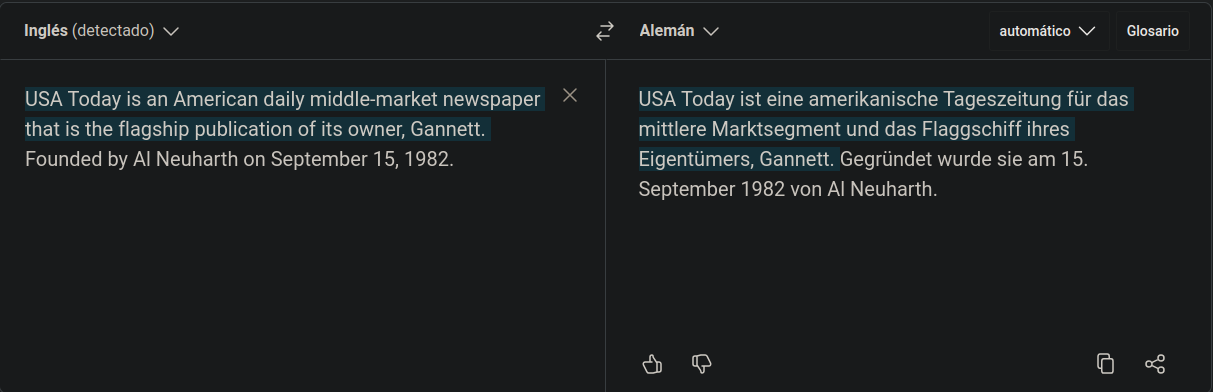